In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [22]:
df = pd.read_csv('retail_sales_dataset.csv')

In [23]:
df.head(20)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [24]:
df.shape

(1000, 9)

In [25]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [26]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [27]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [28]:
# uniques values of the dataset
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [29]:
# numerical columns
numerical_data = df.select_dtypes(exclude = ['object']).columns
print("Numerical columns: ",numerical_data)
# categorical columns
categorical_data = df.select_dtypes(include = ['object']).columns
print("Categorical columns: ",categorical_data)

Numerical columns:  Index(['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount'], dtype='object')
Categorical columns:  Index(['Date', 'Customer ID', 'Gender', 'Product Category'], dtype='object')


In [30]:
# checking null values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [31]:
# gender column frequency
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

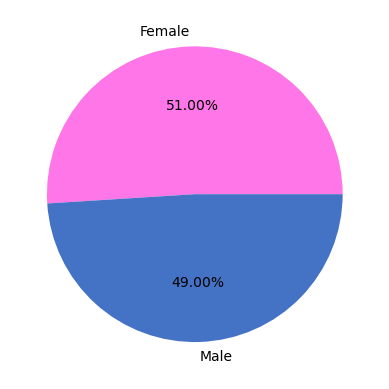

In [32]:
# Define the colors for each gender
colors = {'Male': '#4472C4', 'Female': '#FE76E7'}

# Create the pie chart
df['Gender'].value_counts().plot(kind='pie', autopct='%.2f%%', colors=[colors[key] for key in df['Gender'].value_counts().index])

# Display the plot
plt.ylabel('')  # Optional: to remove the default 'Gender' label from the y-axis
plt.show()

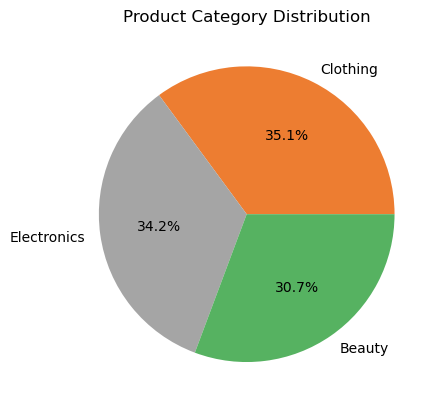

In [33]:
# Count the frequency of each category
category_counts = df['Product Category'].value_counts()

# Define the colors for each category
colors = {
    'Clothing': '#ED7D31',
    'Electronics': '#A5A5A5',
    'Beauty': '#56B261'
}

# Create the pie chart
ax = category_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=[colors[key] for key in category_counts.index],
    title='Product Category Distribution'
)

# Set ylabel to None
ax.set_ylabel(None)

# Display the plot
plt.show()

In [11]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

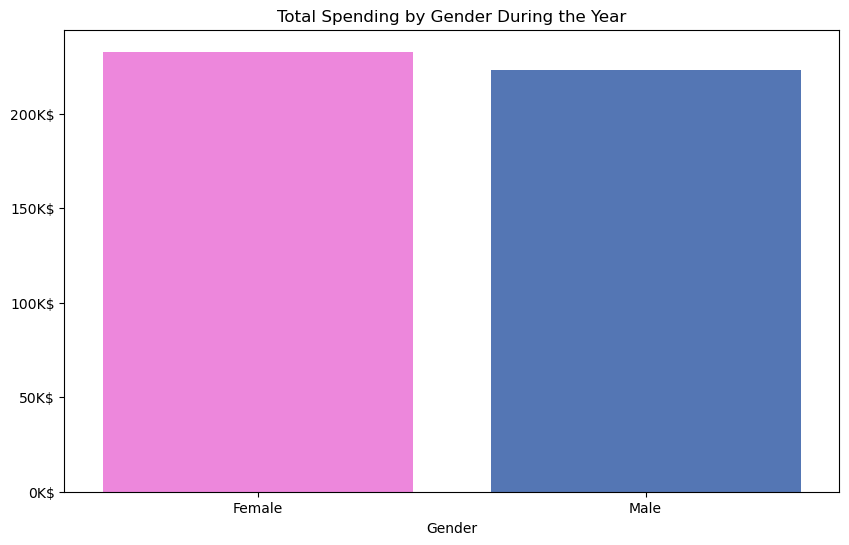

In [6]:
# Total spending by gender
total_sales_by_gender = df.groupby('Gender')['Total Amount'].sum()

# Define colors for male and female
colors = {'Male': '#4472C4', 'Female': '#FE76E7'}

# Function to format the y-axis labels
def thousands_formatter(x, pos):
    return f'{int(x / 1000)}K$'

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=total_sales_by_gender.index, y=total_sales_by_gender.values, palette=colors)

# Apply thousands_formatter to y-axis
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.title('Total Spending by Gender During the Year')
plt.show()


Month: 1
  Male Spending: 12255.00
  Female Spending: 24725.00

Month: 2
  Male Spending: 29665.00
  Female Spending: 14395.00

Month: 3
  Male Spending: 15670.00
  Female Spending: 13320.00

Month: 4
  Male Spending: 16570.00
  Female Spending: 17300.00

Month: 5
  Male Spending: 29220.00
  Female Spending: 23930.00

Month: 6
  Male Spending: 19840.00
  Female Spending: 16875.00

Month: 7
  Male Spending: 18580.00
  Female Spending: 16885.00

Month: 8
  Male Spending: 14880.00
  Female Spending: 22080.00

Month: 9
  Male Spending: 7085.00
  Female Spending: 16535.00

Month: 10
  Male Spending: 19980.00
  Female Spending: 26600.00

Month: 11
  Male Spending: 20030.00
  Female Spending: 14890.00

Month: 12
  Male Spending: 19385.00
  Female Spending: 25305.00



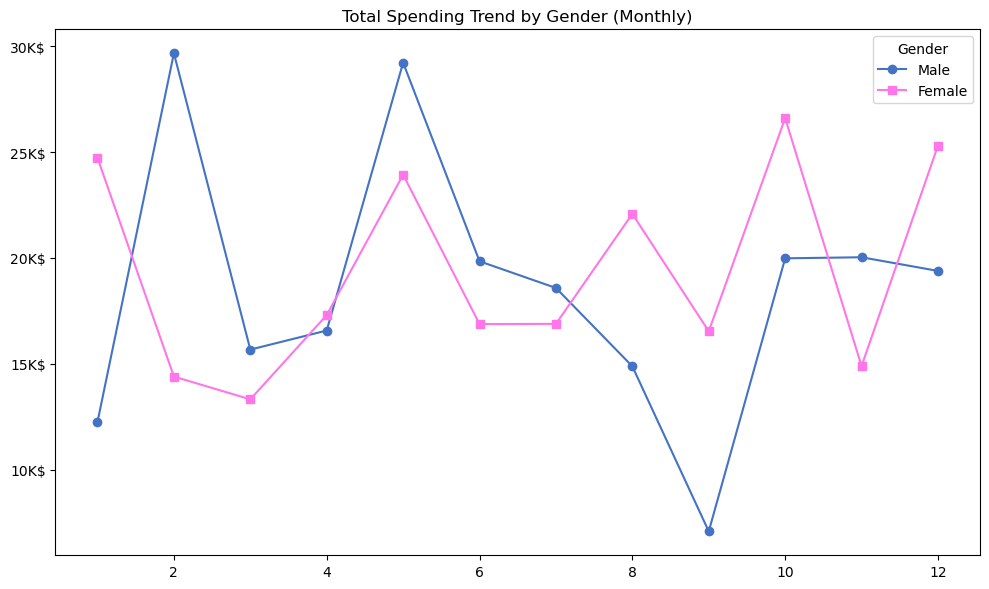

In [34]:
# Ensure 'Total Amount' is numeric
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')

# Drop rows where 'Total Amount' or 'Date' is NaN after conversion
df.dropna(subset=['Total Amount', 'Date'], inplace=True)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by month (extract month from 'Date' column)
monthly_transactions = df.groupby(df['Date'].dt.month)

def calculate_gender_spending(group):
    """Calculates total spending for male and female customers within a group."""
    male_spending = group[group['Gender'] == 'Male']['Total Amount'].sum()
    female_spending = group[group['Gender'] == 'Female']['Total Amount'].sum()
    return pd.Series({'Male': male_spending, 'Female': female_spending})

# Apply the function to each group and store the result
gendered_spending = monthly_transactions.apply(calculate_gender_spending)

# Print results 
for month, gender_data in gendered_spending.iterrows():
    print(f"Month: {month}")
    print(f"  Male Spending: {gender_data['Male']:.2f}")
    print(f"  Female Spending: {gender_data['Female']:.2f}")
    print()  # Add a blank line between months

# Extract month labels and sales data
months = gendered_spending.index.to_list()
male_spending = gendered_spending['Male'].to_list()
female_spending = gendered_spending['Female'].to_list()

# Function to format the y-axis labels
def thousands_formatter(x, pos):
    return f'{int(x / 1000)}K$'

# Create the Lineplot
plt.figure(figsize=(10, 6))
plt.plot(months, male_spending, marker='o', label='Male', color='#4472C4')
plt.plot(months, female_spending, marker='s', label='Female', color='#FE76E7')

# Use the FuncFormatter to format y-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.legend(title='Gender')
plt.title('Total Spending Trend by Gender (Monthly)')
plt.tight_layout()
plt.show()

Date
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: Total Amount, dtype: int64


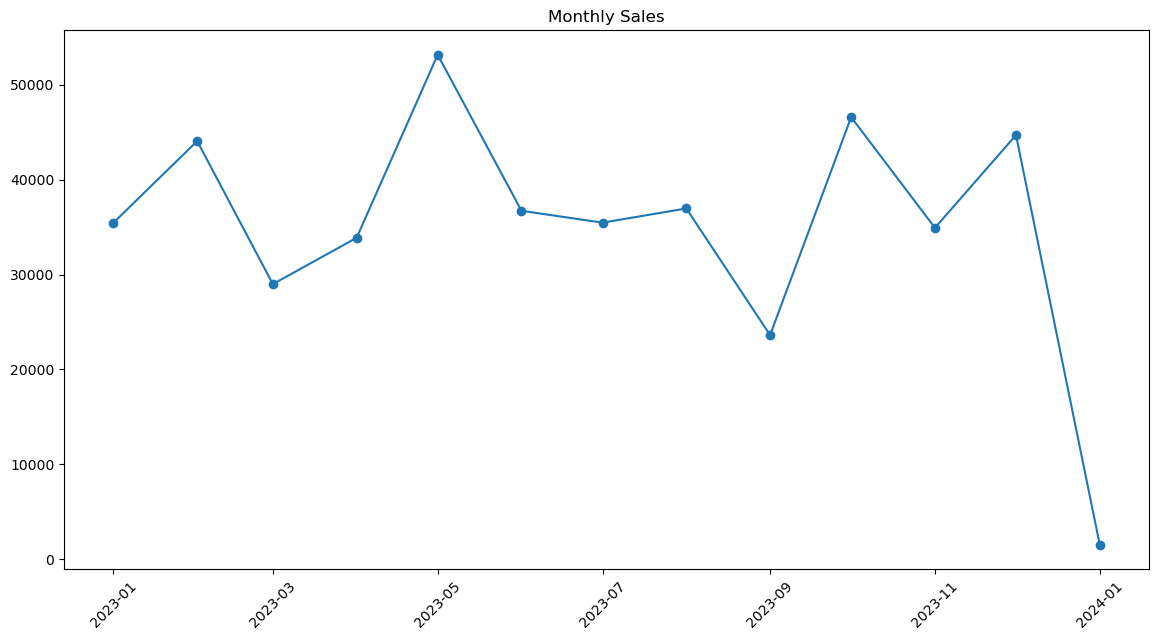

In [35]:
#Aggregate sales data by month
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()
print(monthly_sales)

# Plot monthly sales
plt.figure(figsize=(14, 7))
monthly_sales.index = monthly_sales.index.to_timestamp()
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

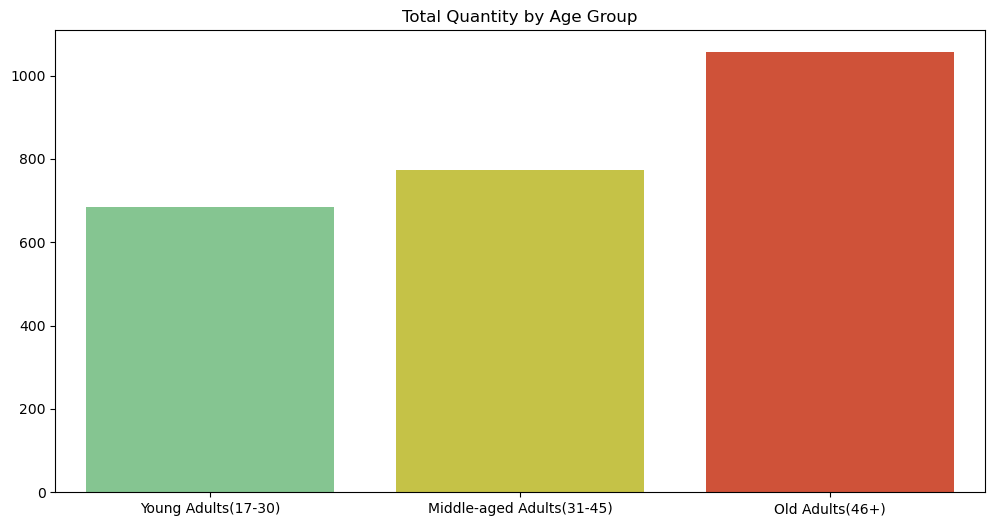

In [36]:
df["Age Group"] = df['Age'].apply(get_age_group)

# Calculate total quantity by age group
age_group_quantity = df.groupby('Age Group')['Quantity'].sum().reset_index()

# Sort the data by 'Quantity' in ascending order
age_group_quantity_sorted = age_group_quantity.sort_values(by='Quantity', ascending=True)
# Define custom colors for each age group
colors = {
    'Old adults(46+)': '#7AD08A',
    'Middle age adults(31-45)': '#DAD632',
    'Young adults(17-30)': '#E84120'
}

# Plot Total Quantity by Age Group
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Quantity', data=age_group_quantity_sorted, palette=sns.color_palette(colors.values()))
plt.title('Total Quantity by Age Group')
plt.xlabel('')
plt.ylabel('')
plt.show()

Month: 1
  Old adults(46+) Spending: 13430.00
  Middle age adults(31-45) Spending: 15370.00
  Young adults(17-30) Spending: 8180.00

Month: 2
  Old adults(46+) Spending: 12010.00
  Middle age adults(31-45) Spending: 13195.00
  Young adults(17-30) Spending: 18855.00

Month: 3
  Old adults(46+) Spending: 12200.00
  Middle age adults(31-45) Spending: 7130.00
  Young adults(17-30) Spending: 9660.00

Month: 4
  Old adults(46+) Spending: 5640.00
  Middle age adults(31-45) Spending: 21295.00
  Young adults(17-30) Spending: 6935.00

Month: 5
  Old adults(46+) Spending: 28745.00
  Middle age adults(31-45) Spending: 9775.00
  Young adults(17-30) Spending: 14630.00

Month: 6
  Old adults(46+) Spending: 13700.00
  Middle age adults(31-45) Spending: 12445.00
  Young adults(17-30) Spending: 10570.00

Month: 7
  Old adults(46+) Spending: 13820.00
  Middle age adults(31-45) Spending: 7765.00
  Young adults(17-30) Spending: 13880.00

Month: 8
  Old adults(46+) Spending: 22320.00
  Middle age adults(31-

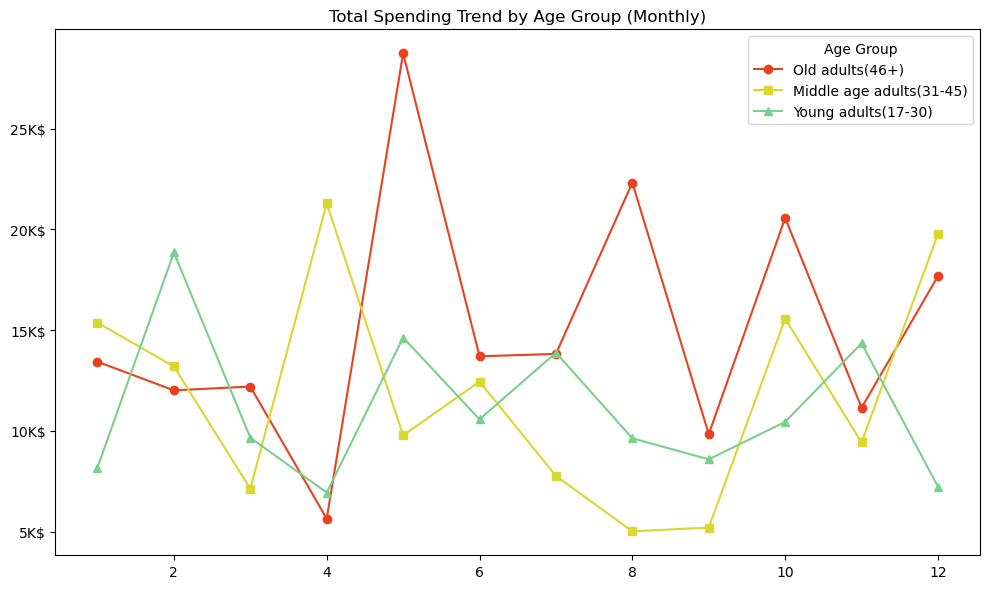

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Ensure 'Total Amount' is numeric
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')

# Drop rows where 'Total Amount' or 'Date' is NaN after conversion
df.dropna(subset=['Total Amount', 'Date'], inplace=True)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by month (extract month from 'Date' column)
monthly_transactions = df.groupby(df['Date'].dt.month)

# Define age group categories
age_groups = {
    'Old adults(46+)': (46, 100),
    'Middle age adults(31-45)': (31, 45),
    'Young adults(17-30)': (17, 30)
}

# Function to assign age groups
def assign_age_group(age):
    for group, (lower, upper) in age_groups.items():
        if lower <= age <= upper:
            return group
    return 'Unknown'

# Assuming there is an 'Age' column in the dataframe
df['Age Group'] = df['Age'].apply(assign_age_group)

def calculate_age_group_spending(group):
    """Calculates total spending for each age group within a group."""
    spending = {}
    for age_group in age_groups.keys():
        spending[age_group] = group[group['Age Group'] == age_group]['Total Amount'].sum()
    return pd.Series(spending)

# Apply the function to each group and store the result
age_group_spending = monthly_transactions.apply(calculate_age_group_spending)

# Print results 
for month, age_data in age_group_spending.iterrows():
    print(f"Month: {month}")
    for age_group, spending in age_data.items():
        print(f"  {age_group} Spending: {spending:.2f}")
    print()  # Add a blank line between months

# Extract month labels and sales data
months = age_group_spending.index.to_list()
old_adults_spending = age_group_spending['Old adults(46+)'].to_list()
middle_age_adults_spending = age_group_spending['Middle age adults(31-45)'].to_list()
young_adults_spending = age_group_spending['Young adults(17-30)'].to_list()

# Function to format the y-axis labels
def thousands_formatter(x, pos):
    return f'{int(x / 1000)}K$'

# Create the Lineplot
plt.figure(figsize=(10, 6))
plt.plot(months, old_adults_spending, marker='o', label='Old adults(46+)', color='#E84120')
plt.plot(months, middle_age_adults_spending, marker='s', label='Middle age adults(31-45)', color='#DAD632')
plt.plot(months, young_adults_spending, marker='^', label='Young adults(17-30)', color='#7AD08A')

# Use the FuncFormatter to format y-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.legend(title='Age Group')
plt.title('Total Spending Trend by Age Group (Monthly)')
plt.tight_layout()
plt.show()

Day of Week
Monday       70250
Tuesday      69440
Wednesday    58770
Thursday     53835
Friday       66290
Saturday     78815
Sunday       58600
Name: Total Amount, dtype: int64


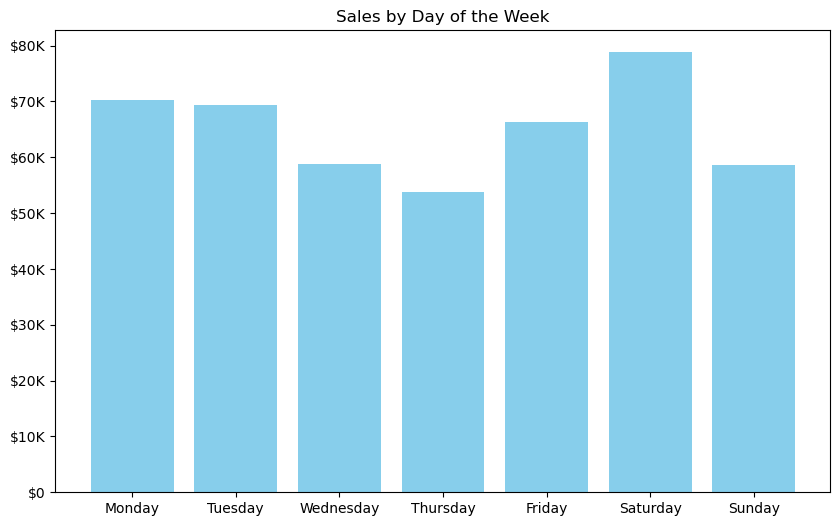

In [12]:
# Custom formatter function to format y-axis labels
def currency_format(x, pos):
    if x >= 1000:
        return f'${x/1000:.0f}K'
    else:
        return f'${x:.0f}'

# 3. Aggregate sales data by day of the week
df['Day of Week'] = df['Date'].dt.day_name()
weekday_sales = df.groupby('Day of Week')['Total Amount'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
print(weekday_sales)

# Plot sales by day of the week
plt.figure(figsize=(10, 6))
plt.bar(weekday_sales.index, weekday_sales.values, color='skyblue')
plt.title('Sales by Day of the Week')
plt.grid(False)

# Apply the custom formatter to the y-axis
formatter = FuncFormatter(currency_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


In [13]:
def get_age_group(age):
    if age in range(0, 3):
        return "Babies(0-2)"
    elif age in range(3, 17):
        return "Children(3-16)"
    elif age in range(17, 31):
        return "Young Adults(17-30)"
    elif age in range(31, 46):
        return "Middle-aged Adults(31-45)"
    else:
        return "Old Adults(46+)"

# Apply the function to create 'Age Group' column
df["Age Group"] = df['Age'].apply(get_age_group)

# Displaying the DataFrame
print(df.head())

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount Day of Week  \
0         3              50           150      Friday   
1         2             500          1000      Monday   
2         1              30            30      Friday   
3         1             500           500      Sunday   
4         2              50           100    Saturday   

                   Age Group  
0  Middle-aged Adults(31-45)  
1        Young Adults(17-30)  
2            Old Adults(46+)  
3  Middle-aged Adults(31-45)  
4        Young Adults(17-30)  


In [19]:
from scipy.stats import ttest_ind

# Extract data for beauty products
beauty_data = df[df['Product Category'] == 'Beauty']

# Separate data for male and female customers
male_beauty_spending = beauty_data[beauty_data['Gender'] == 'Male']['Total Amount']
female_beauty_spending = beauty_data[beauty_data['Gender'] == 'Female']['Total Amount']

# Perform t-test
t_statistic, p_value = ttest_ind(male_beauty_spending, female_beauty_spending)

# Print the results
print(f"T-Statistic: {t_statistic:.2f}")
print(f"P-Value: {p_value:.5f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in spending on beauty products between male and female customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in spending on beauty products between male and female customers.")


T-Statistic: 0.56
P-Value: 0.57424
Fail to reject the null hypothesis: There is no significant difference in spending on beauty products between male and female customers.
